IMPORTING REQUIRED LIBRARIES

In [ ]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

LFR GRAPH

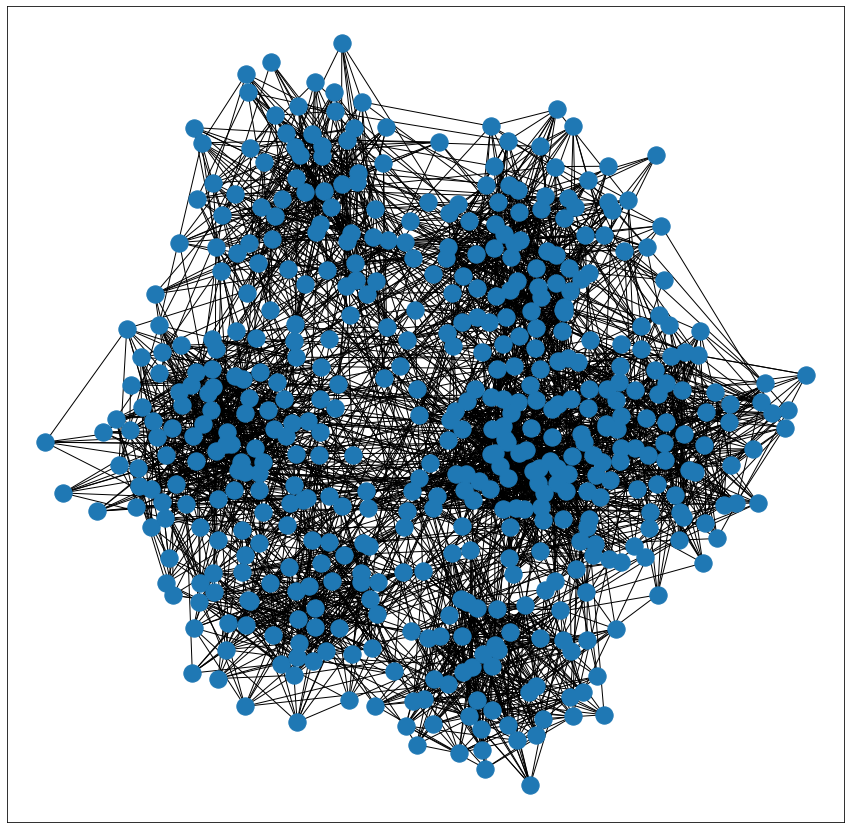

In [ ]:
from networkx.generators.community import LFR_benchmark_graph
n = 500
tau1 = 2
tau2 = 1.1
mu = 0.1
G = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=10, min_community=50, max_community=100,max_degree=30, seed=10)
plt.figure(figsize=(15,15))
nx.draw_networkx(G,with_labels=False)

LOVAIN BEST PARTITION OF LFR GRAPH

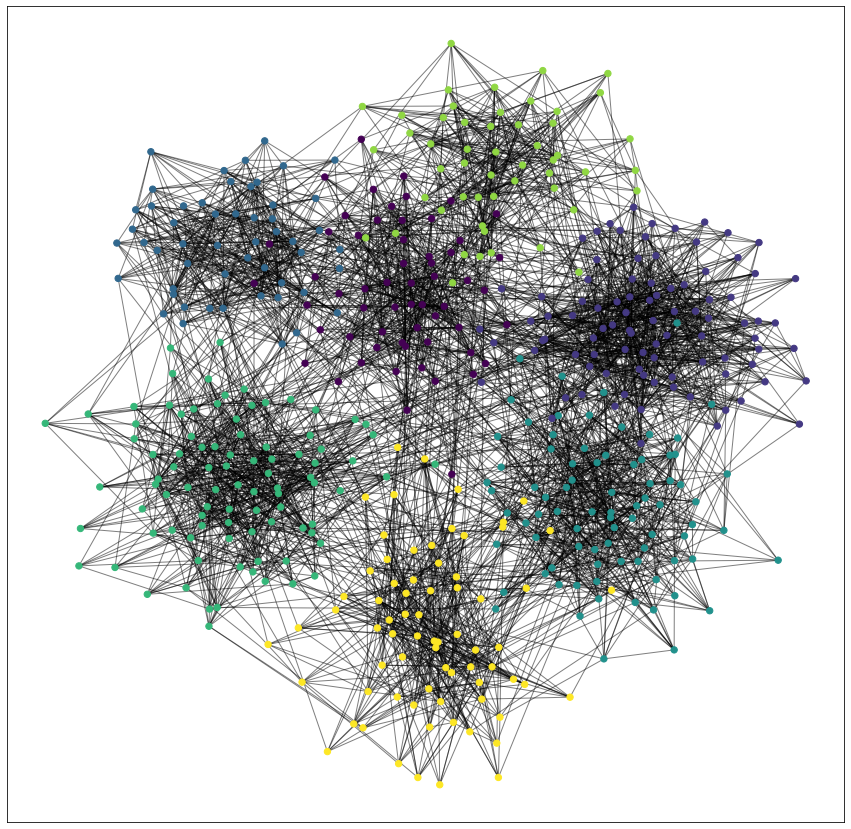

In [ ]:
#compute the best partition
partition = community_louvain.best_partition(G)
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G, pos, partition.keys(), label=True, node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

PARTITION

In [ ]:
partition

In [ ]:
mx=0
for value in partition.values():
  if value>mx:
    mx=value
print(mx)

6


FORMING THE CLUSTERS

In [ ]:
cluster = [[],[],[],[],[],[],[]]
for i in partition:
  cluster[partition[i]].append(i)

In [ ]:
# Clusters and their nodes
var = 1
for i in cluster:
  print("Cluster ",var,"= ",i) 
  var+=1

Cluster  1 =  [10, 13, 23, 37, 54, 58, 67, 89, 91, 103, 114, 118, 119, 125, 126, 127, 139, 145, 156, 157, 163, 183, 192, 203, 206, 214, 223, 228, 229, 239, 254, 261, 266, 269, 270, 303, 311, 327, 350, 361, 364, 371, 376, 380, 383, 384, 401, 426, 429, 437, 444, 447, 450, 459, 460, 464, 488, 490, 497]
Cluster  2 =  [6, 7, 14, 15, 24, 41, 47, 68, 75, 80, 83, 84, 85, 86, 95, 96, 97, 100, 102, 109, 110, 120, 128, 133, 134, 140, 147, 150, 151, 159, 165, 166, 167, 170, 172, 181, 182, 184, 188, 190, 194, 201, 204, 205, 208, 212, 216, 217, 218, 224, 226, 230, 236, 243, 247, 255, 256, 257, 258, 259, 260, 268, 272, 273, 290, 293, 300, 317, 319, 331, 337, 339, 344, 348, 353, 355, 370, 373, 381, 390, 409, 411, 418, 419, 420, 435, 442, 469, 474, 475, 479, 499]
Cluster  3 =  [3, 4, 11, 20, 33, 34, 39, 40, 42, 43, 46, 51, 53, 63, 65, 66, 87, 90, 130, 131, 132, 135, 138, 142, 149, 153, 155, 162, 173, 200, 202, 211, 233, 235, 237, 244, 245, 253, 264, 276, 294, 301, 379, 382, 387, 389, 439, 477, 483, 486

GRAPH MATRIX

In [ ]:
# making the graph matrix from Graph (G)
mat = nx.to_numpy_matrix(G)

In [ ]:
# printing the numpy matrix
mat

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]])

UNIFIABILITY

In [ ]:
# Unifiability of cluster C(i) and C(j)

def Unifiability(G,Ci,Cj,mat):

  sum1,sum2,sum3 = 0,0,0

  for i in Ci:
    for j in Cj:
      sum1+=int(mat[[i],[j]])

  for i in Ci:
    for j in G:
      sum2+=int(mat[[i],[j]])
    for j in Cj:
      sum2-=int(mat[[i],[j]])
  
  for i in Cj:
    for j in G:
      sum3+=int(mat[[i],[j]])
    for j in Ci:
      sum3-=int(mat[[i],[j]])

  return sum1/(sum2+sum3-sum1)

In [ ]:
# Unifiability between cluster1 and cluster2

Unifiability(G,cluster[0],cluster[1],mat)

0.017905102954341987

AVERAGE UNIFIABILITY

In [ ]:
def AVU(G,cluster,mat):
  
  # calling Unifiability for all clusters

  sum_unifiability = 0

  for i in cluster:
    for j in cluster:
      if i!=j:
        sum_unifiability += Unifiability(G,i,j,mat)

  return sum_unifiability/len(cluster)

In [ ]:
AVU_G = AVU(G=G,cluster=cluster,mat=mat)


In [ ]:
# AVU of graph G
AVU_G

0.07921466650938067

ISOLABILITY

In [ ]:
# Isolability of cluster C(i)

def Isolability(G,Ci,mat):

  sum1,sum2 = 0,0

  for i in Ci:
    for j in Ci:
        sum1+=int(mat[[i],[j]])

  for i in Ci:
    for j in G:
      if i!=j:
        sum2+=int(mat[[i],[j]])

  return sum1/(sum1+sum2)

In [ ]:
# Isolability of Cluster1
Isolability(G=G,Ci=cluster[0],mat=mat)

0.45454545454545453

AVERAGE ISOLABILITY

In [ ]:
# AVI

def AVI(G,cluster,mat):

  sum = 0
  
  for i in cluster:
    sum += Isolability(G,i,mat)

  return sum/len(cluster)

In [ ]:
AVI_G = AVI(G,cluster,mat)

In [ ]:
# AVI of graph G

AVI_G

0.45892163841360223

AVERAGE UNIFIABILITY AND ISOLABILITY

In [ ]:
# AUI 

def AUI(G,cluster,mat):
  avi = AVI(G,cluster,mat)
  avu = AVU(G=G,cluster=cluster,mat=mat)
  return (2*avi)/(1+avu*avi)

In [ ]:
AUI_G = AUI(G,cluster,mat)

In [ ]:
# AUI of graph G

AUI_G

0.8856470617622901

AVERAGE NORMALIZED UNIFIABILITY AND ISOLABILIITY

In [ ]:
# ANUI

def ANUI(G,cluster,mat):
  return AUI(G,cluster,mat)/2

In [ ]:
ANUI_G = ANUI(G,cluster,mat)

In [ ]:
# ANUI of graph G

ANUI_G

0.44282353088114507

In [ ]:
import math

In [ ]:
!pip install cdlib
from cdlib import algorithms

USING SCAN ALGORITHM FOR PARTITION

In [ ]:
com = algorithms.scan(G, epsilon=0.3, mu=1)
clusters = com.communities

In [ ]:
clusters

In [ ]:
clusters=clusters[:6]
clusters

MAKING THE TRUELABEL

In [ ]:
truelabel = {new_list: 6 for new_list in range(501)}
truelabel

In [ ]:
for i in range(len(clusters)):
  for node in clusters[i]:
    truelabel[node] = i

In [ ]:
truelabel

In [ ]:
import math

NMI MEASURE FOR LFR

In [ ]:
## normalized mutual Information 
## NMI = 2*I(Y;C)/[H(Y)+H(C)]

def NMI(G,truelabel,predlabel,cluster):

  ## Entropy of class label
  prob = {}
  for i in G:
    if truelabel[i] in prob:
      prob[truelabel[i]] += 1.0
    else:
      prob[truelabel[i]] = 0.0

  u = []
  for i in prob:
    u.append(prob[i]/len(G)) 

  hy = 0.0
  for i in u:
    hy += (-i)*(math.log(i,2))

  ## Entropy of cluster label
  prob2 = {}
  for i in G:
    if predlabel[i] in prob2:
      prob2[predlabel[i]] += 1.0
    else:
      prob2[predlabel[i]] = 0.0

  v = []
  for i in prob2:
    v.append(prob2[i]/len(G))


  hc = 0.0
  for i in v:
    hc += (-i)*(math.log(i,2))
  
  print("hy\t:Entropy of class label\t\t\t = ",hy)
  print("hc\t:Entropy of cluster label\t\t = ",hc)

  ## Mutual Information

  
  hyc = 0.0
  for j in cluster:

    p = {}
    p.clear()
    for i in G:
      p[predlabel[i]]=0.0

    for i in j:

      if predlabel[i] == truelabel[i]:
        p[predlabel[i]]+= 1.0


    for i in p:
      p[i]=p[i]/len(j)
    
    temp = 0.0
    for i in p:
      if p[i] != 0:
        hyc -= p[i]*(math.log(p[i],2))

  iyc = hy -hyc
  print("hyc\t:Entropy of class label within cluster\t = ",hyc)
  print("iyc\t:Mutual Information\t\t\t = ",iyc)
  return print("\nNMI  = ",(2*iyc)/(hy+hc))

In [ ]:
# value of NMI for Louvian clustering of graph G

NMI(G,truelabel,partition,cluster)

hy	:Entropy of class label			 =  2.7188418427654426
hc	:Entropy of cluster label		 =  2.7515796256671066
hyc	:Entropy of class label within cluster	 =  0.39555512591040976
iyc	:Mutual Information			 =  2.3232867168550326

NMI  =  0.849399531740551


CLOSENESS CENTRALITY FOR LFR

In [ ]:
close_centrality=nx.closeness_centrality(G)
print(close_centrality)

{0: 0.5689655172413793, 1: 0.4852941176470588, 2: 0.559322033898305, 3: 0.4647887323943662, 4: 0.3793103448275862, 5: 0.38372093023255816, 6: 0.38372093023255816, 7: 0.44, 8: 0.515625, 9: 0.4342105263157895, 10: 0.3793103448275862, 11: 0.36666666666666664, 12: 0.3707865168539326, 13: 0.515625, 14: 0.3707865168539326, 15: 0.3707865168539326, 16: 0.28448275862068967, 17: 0.375, 18: 0.3707865168539326, 19: 0.5, 20: 0.3707865168539326, 21: 0.375, 22: 0.3707865168539326, 23: 0.39285714285714285, 24: 0.375, 25: 0.375, 26: 0.3626373626373626, 27: 0.4583333333333333, 28: 0.4520547945205479, 29: 0.38372093023255816, 30: 0.4583333333333333, 31: 0.5409836065573771, 32: 0.515625, 33: 0.55}
